# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("loaded train and test files")
print()

loaded train and test files



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

5


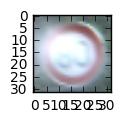

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [4]:
"""Print sizes of few images"""
for image in X_train[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 53, max: 255
shape: (32, 32, 3), min: 53, max: 255
shape: (32, 32, 3), min: 50, max: 255
shape: (32, 32, 3), min: 37, max: 255
shape: (32, 32, 3), min: 44, max: 255


Num: 1 Class: 9
Num: 2 Class: 9
Num: 3 Class: 28
Num: 4 Class: 1
Num: 5 Class: 6
Num: 6 Class: 41
Num: 7 Class: 8
Num: 8 Class: 27
Num: 9 Class: 37
Num: 10 Class: 12
Num: 11 Class: 3
Num: 12 Class: 30
Num: 13 Class: 35
Num: 14 Class: 4
Num: 15 Class: 1
Num: 16 Class: 10
Num: 17 Class: 10
Num: 18 Class: 33
Num: 19 Class: 13
Num: 20 Class: 30
Num: 21 Class: 8
Num: 22 Class: 13
Num: 23 Class: 12
Num: 24 Class: 35
Num: 25 Class: 20
Num: 26 Class: 9
Num: 27 Class: 18
Num: 28 Class: 17
Num: 29 Class: 13
Num: 30 Class: 38
Num: 31 Class: 12
Num: 32 Class: 8
Num: 33 Class: 26
Num: 34 Class: 10
Num: 35 Class: 30
Num: 36 Class: 40
Num: 37 Class: 2
Num: 38 Class: 13
Num: 39 Class: 35
Num: 40 Class: 13
Num: 41 Class: 25
Num: 42 Class: 1
Num: 43 Class: 15
Num: 44 Class: 12
Num: 45 Class: 2
Num: 46 Class: 38
Num: 47 Class: 38
Num: 48 Class: 10
Num: 49 Class: 2
Num: 50 Class: 12
Num: 51 Class: 5
Num: 52 Class: 9
Num: 53 Class: 8
Num: 54 Class: 10
Num: 55 Class: 7
Num: 56 Class: 17
Num: 57 Class: 4
Num

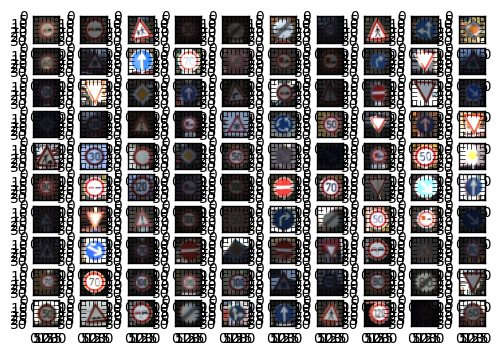

In [5]:
def display_label_images(images):
    """Display 100 random images from training set."""
m1 = 10
m2 = 10
for i in range(m1):
    for j in range(m2):
        num = i*10+j +1
        plt.subplot(m1,m2,num)
        index= random.randint(0, len(X_train))
        plt.imshow(X_train[index])
        print("Num: {0} Class: {1}".format(num, y_train[index]))

display_label_images(X_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

count trainig data for each class.


(array([ 2430.,  2250.,  1410.,  1980.,  1860.,   420.,  2850.,  1470.,
         2010.,  1320.,  2100.,  2160.,  1410.,   420.,  1110.,  1200.,
          210.,   360.,   720.,   510.,   270.,  1500.,   600.,   240.,
          810.,   450.,   780.,   240.,   689.,   420.,  1590.,   210.,
         2070.,   300.,   360.,   480.]),
 array([  0.        ,   1.16666667,   2.33333333,   3.5       ,
          4.66666667,   5.83333333,   7.        ,   8.16666667,
          9.33333333,  10.5       ,  11.66666667,  12.83333333,
         14.        ,  15.16666667,  16.33333333,  17.5       ,
         18.66666667,  19.83333333,  21.        ,  22.16666667,
         23.33333333,  24.5       ,  25.66666667,  26.83333333,
         28.        ,  29.16666667,  30.33333333,  31.5       ,
         32.66666667,  33.83333333,  35.        ,  36.16666667,
         37.33333333,  38.5       ,  39.66666667,  40.83333333,  42.        ]),
 <a list of 36 Patch objects>)

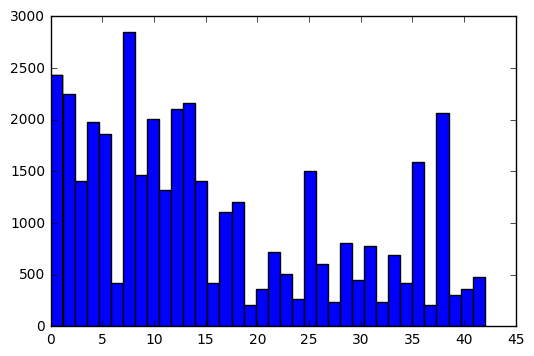

In [7]:
print("count trainig data for each class.")
plt.hist(y_train, bins="auto")

In [8]:
#Normalize data
def normalize_data(data, min_val, max_val, a, b):
    return a + (data - min_val)*(b-a)/(max_val - min_val)

X_train = normalize_data(X_train, 0, 255, -0.5, 0.5)
X_test = normalize_data(X_test, 0, 255, -0.5, 0.5)

In [9]:
"""Print sizes of few images"""
for image in X_train[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: -0.4725490196078431, max: 0.20196078431372544
shape: (32, 32, 3), min: -0.4647058823529412, max: 0.5
shape: (32, 32, 3), min: -0.4725490196078431, max: 0.5
shape: (32, 32, 3), min: -0.3862745098039216, max: 0.5
shape: (32, 32, 3), min: -0.44901960784313727, max: 0.5


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Data is already 32x32 and 3 color channels as required by tensorflow. So, I did only random sampling of the training data. Count number of samples per class. There should not be huge diffrence in number of samples per class. Normalize such that the values are between 0-1 instead of 0-255.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [10]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [11]:
"""Create a validation set from training samples"""
from sklearn.model_selection import train_test_split
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.5, random_state=0)
print("Number of training examples =", len(X_train_new))
print("Number of validation examples =", len(X_validation))
print("Number of test examples =", len(X_test))

Number of training examples = 19604
Number of validation examples = 19605
Number of test examples = 12630


**Answer:** created validation set from training examples using sklearn train_test_split method. considered more examples for training - 80:20 split.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [13]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


# **Answer:**

In this architecture, I used both both convolutional network and fully connected network. In a convolutional layer each neuron share the same set of weights. This connection pattern only makes sense for cases where the data can be interpreted as spatial with the features to be extracted being spatially local, particularily helpful in image data. For example "nose" consists of a set of nearby pixels, not spread all across the image. In a fully connected layer each neuron is connected to every neuron in the previous layer, and each connection has it's own weight. This is a totally general purpose connection pattern.

I did not use dropout as it did not improve accuracy. 
Increasing number of layers helps to solve complex problems and helps parameter efficiency as I learned from tensorflow. Deep models capture heirarchical structure of the object. In lower layer, it can capture lines, when we move up the layer, it learns about bigger geaometric shapes and complex objects like face, Nose etc.  

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [17]:
rate = 0.003

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.923

EPOCH 2 ...
Validation Accuracy = 0.966

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.984

EPOCH 5 ...
Validation Accuracy = 0.985

EPOCH 6 ...
Validation Accuracy = 0.990

EPOCH 7 ...
Validation Accuracy = 0.992

EPOCH 8 ...
Validation Accuracy = 0.986

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.992

Model saved


In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.920


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Most values I kept same from LeNet code like AdamOptimizer with zero mean and stddev 0f 0.1. Played with learning rate values 0.01, 0.001 and 0.003. I increased learning rate to 0.003 which gave better test accruracy also. EPOCH of 10 was good. Batch Size of 128 also good.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I simply understood LeNet architecture and implemented the same. Palyed with diffrent EPOCH, Batch Size and learning rate values. Fine tuned them. Trafic sign recognition can be modeled as convulutions unlike MNIST hand written recognition. There are 43 classes here. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

(5, 32, 32, 3)


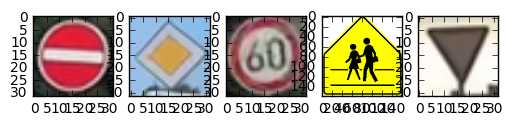

In [77]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import ndimage
import numpy as np
import glob
import skimage.transform
filelist = glob.glob('new_image/*.png')

images = np.array([np.array(ndimage.imread(fname)) for fname in filelist])
# Resize images
images_list = [skimage.transform.resize(image, (32, 32))
                for image in images]
images_norm = np.array(images_list)

#for image in images_norm[:5]:
#    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
print(images_norm.shape)

for j in range(1,6):
    plt.subplot(1,5,j)
    plt.imshow(images[j-1])
plt.show()
    

#images_norm = normalize_data(images, 0, 255, -0.5, 0.5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** If I take USA trafic signs, it did not work, meaning test accuracy became 60%. However, EU countires, accuracy is 80%. In the above display, 4th image (school children crossing road sign), when I added this, accuracy became 60%. 

In [79]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#im_class= [13,3,27,28,17]
im_class= [17,12,3,28,13]
prob = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(images_norm, im_class)
    sm = sess.run(prob, feed_dict={x: images_norm, y: im_class})
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**As we see 4 out of 5 are predicted correct (80%) for EU contires, this is resonable. However, when I added an unseen trafic sing of US, it could not classify and accuracy further reduced to 60%.

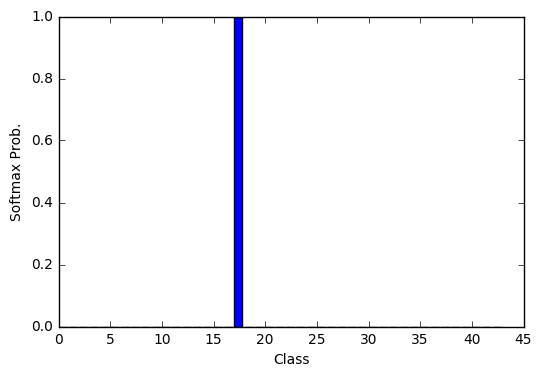

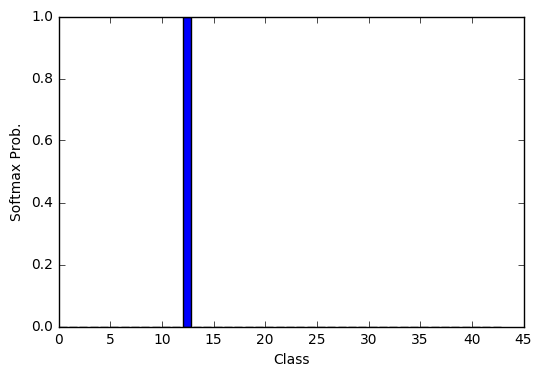

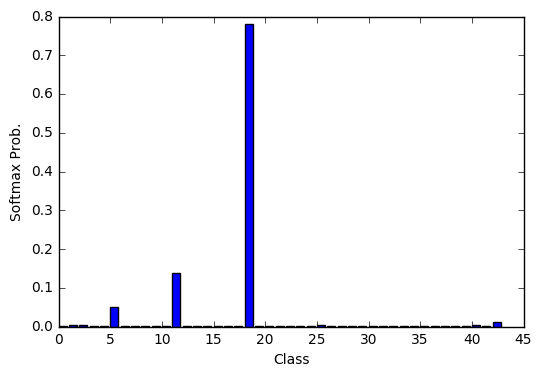

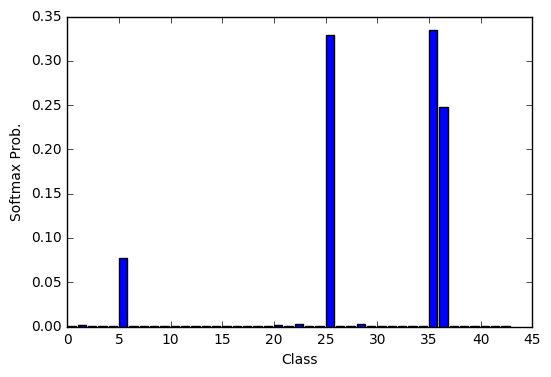

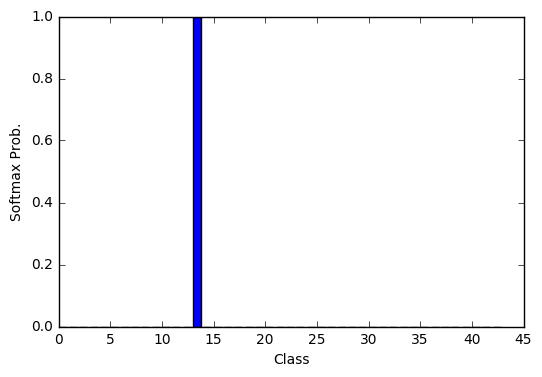

In [80]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
x_axis = list(range(0,n_classes))
plt.bar(range(0,43), sm[0])
plt.xlabel("Class")
plt.ylabel("Softmax Prob.")
plt.show()
plt.bar(range(0,43), sm[1])
plt.xlabel("Class")
plt.ylabel("Softmax Prob.")
plt.show()
plt.bar(range(0,43), sm[2])
plt.xlabel("Class")
plt.ylabel("Softmax Prob.")
plt.show()
plt.bar(range(0,43), sm[3])
plt.xlabel("Class")
plt.ylabel("Softmax Prob.")
plt.show()
plt.bar(range(0,43), sm[4])
plt.xlabel("Class")
plt.ylabel("Softmax Prob.")
plt.show()

In [81]:
for i in range(0,5):
    with tf.Session() as sess:
        val = tf.nn.top_k(sm[i], 3)
        res = sess.run(val)
        print (res)

TopKV2(values=array([  1.00000000e+00,   1.73376039e-23,   7.65033608e-27], dtype=float32), indices=array([17,  9, 26], dtype=int32))
TopKV2(values=array([  1.00000000e+00,   6.65071741e-17,   5.87826472e-18], dtype=float32), indices=array([12, 26, 17], dtype=int32))
TopKV2(values=array([ 0.7796042 ,  0.1368718 ,  0.05096268], dtype=float32), indices=array([18, 11,  5], dtype=int32))
TopKV2(values=array([ 0.33517838,  0.32922548,  0.24836315], dtype=float32), indices=array([35, 25, 36], dtype=int32))
TopKV2(values=array([  1.00000000e+00,   5.27671458e-22,   1.60027124e-22], dtype=float32), indices=array([13, 12, 32], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** We see, NN is very certainty of its predictions even 60km sign was classified as 80km. More training data of this label might help.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.